In [48]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train  = pd.read_csv("/Users/dev/Personal/DS & AI Class Notes/Data Sets/Boosting/Santander/train.csv")
print(f'Shape of this Df is {df_train.shape}')

Shape of this Df is (200000, 202)


In [3]:
df_test  = pd.read_csv("/Users/dev/Personal/DS & AI Class Notes/Data Sets/Boosting/Santander/test.csv")
print(f'Shape of this Df is {df_test.shape}')

Shape of this Df is (200000, 201)


In [4]:
df_sample = pd.read_csv("/Users/dev/Personal/DS & AI Class Notes/Data Sets/Boosting/Santander/sample_submission.csv")
print(f'Shape of this Df is {df_sample.shape}')

Shape of this Df is (200000, 2)


In [5]:
df_sample.drop("ID_code",axis = 1 , inplace= True)

In [6]:
df_sample ### It's Having Target column of test.csv

,target
0,0
1,0
2,0
3,0
4,0
...,...
199995,0
199996,0
199997,0
199998,0


In [7]:
df_test = pd.concat([df_test,df_sample],axis=1)

In [8]:
df_test.shape

(200000, 202)

In [9]:
df_train.shape

(200000, 202)

In [10]:
df = pd.concat([df_train,df_test],axis=0)

In [11]:
df

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,0,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,0,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,0,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,0,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


## Checking Balance of DF["target"]

In [12]:
df["target"].value_counts()

0    379902
1     20098
Name: target, dtype: int64

<AxesSubplot:>

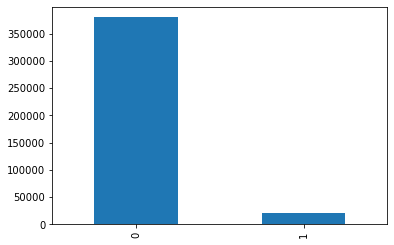

In [13]:
df["target"].value_counts().plot(kind = 'bar')

## Correcting Balance of DF["target"]

In [14]:
X = df.drop("target",axis=1)

In [15]:
y = df["target"]

In [16]:
y.value_counts()

0    379902
1     20098
Name: target, dtype: int64

In [17]:
from imblearn.over_sampling import RandomOverSampler

In [18]:
ros = RandomOverSampler(random_state=45)

In [19]:
X_ros , y_ros = ros.fit_resample(X , y)

In [20]:
X_ros.shape , y_ros.shape

((759804, 201), (759804,))

In [21]:
df1 = pd.concat([X_ros,y_ros],axis=1)
df1.drop("ID_code",axis=1,inplace=True)

In [22]:
df1

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914,0
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518,0
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965,0
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996,0
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759799,6.2320,0.6299,10.6091,8.1428,10.8811,-13.9916,6.1662,14.1755,-2.1012,6.5713,...,14.1715,1.2113,1.7506,17.2297,0.9298,8.6074,9.8285,11.6789,-15.5604,1
759800,15.5017,-1.1104,12.8227,6.4774,11.6134,-4.7678,6.2008,23.5781,5.3386,7.8592,...,9.0432,2.9135,2.9125,14.4748,-0.5911,2.1248,8.2834,13.4610,5.1630,1
759801,12.2609,0.0162,9.7493,8.6286,9.0208,0.1674,3.9420,23.8448,-2.0134,7.6408,...,7.2343,0.1713,7.9293,15.6772,-1.1242,5.6321,9.4946,13.2205,3.6294,1
759802,7.5726,-7.3964,10.0867,9.7183,11.2825,7.2236,7.2602,18.9095,2.1322,7.3880,...,3.3419,0.9323,-0.7488,15.3310,-2.8597,1.5772,8.0856,14.2240,-2.3941,1


## After Correcting the Balance of DF["target"]


In [23]:
df1["target"].value_counts()

0    379902
1    379902
Name: target, dtype: int64

<AxesSubplot:>

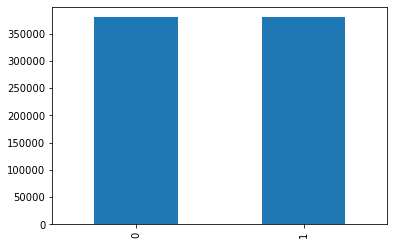

In [24]:
df1["target"].value_counts().plot(kind = 'bar')

## Shuffling The DF

In [25]:
df1 = df1.sample(frac=1)

In [26]:
df1.isna().sum()

var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
          ..
var_196    0
var_197    0
var_198    0
var_199    0
target     0
Length: 201, dtype: int64

In [27]:
df1.columns[-2::-1]

Index(['var_199', 'var_198', 'var_197', 'var_196', 'var_195', 'var_194',
       'var_193', 'var_192', 'var_191', 'var_190',
       ...
       'var_9', 'var_8', 'var_7', 'var_6', 'var_5', 'var_4', 'var_3', 'var_2',
       'var_1', 'var_0'],
      dtype='object', length=200)

In [28]:
clist = df1.columns[-2::-1]

## OD_Tech

In [29]:
def odiqr(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)
    m = df.mean()
    df = df.apply(lambda x : m if x < low else (m if x > high else x ) )
    return df

In [30]:
def odmsd(df):
    m = round(df.mean(),2)
    s = round(df.std(),2)
    low = round(m-(3*s),2)
    high = round(m+(3*s),2)
    ft1 = df[df<low]
    ft2 = df[df>high]
    df = df.map(lambda x : low if x < low else (high if x > high else x ))

In [31]:
for i in clist:
    print(f'{i} is {df1[i].skew()}')

var_199 is -0.19078239492341922
var_198 is -0.16719244946115275
var_197 is -0.048387052860291685
var_196 is -0.0335867077753837
var_195 is 0.12689602751425552
var_194 is 0.0033632398598156593
var_193 is -0.11374044562504841
var_192 is 0.14275074997036302
var_191 is 0.2021226659923518
var_190 is 0.04134769535080233
var_189 is -0.009412235276702131
var_188 is 0.03202129325891728
var_187 is -0.01932956896641071
var_186 is 0.12522016188214213
var_185 is -0.03641531353733089
var_184 is 0.13727886698417646
var_183 is 0.07484111623852865
var_182 is -0.0008421886900876539
var_181 is 0.20724938247085245
var_180 is 0.06767926146655952
var_179 is 0.2631043364197708
var_178 is 0.006425681666107718
var_177 is 0.12253186361724698
var_176 is -0.0698674716450247
var_175 is 0.13611342106841182
var_174 is -0.12520317853634055
var_173 is -0.06986447945213704
var_172 is 0.049188113022389644
var_171 is 0.016300704488104098
var_170 is 0.12468840073973564
var_169 is 0.011516453543342756
var_168 is 0.27292867

In [32]:
for i in df1.columns:
    if df1[i].skew() <= 0.5:
        odmsd(df1[i])
    else:
        df1[i] = odiqr(df1[i])

In [33]:
for i in clist:
    print(f'{i} is {df1[i].skew()}')

var_199 is -0.19078239492341922
var_198 is -0.16719244946115275
var_197 is -0.048387052860291685
var_196 is -0.0335867077753837
var_195 is 0.12689602751425552
var_194 is 0.0033632398598156593
var_193 is -0.11374044562504841
var_192 is 0.14275074997036302
var_191 is 0.2021226659923518
var_190 is 0.04134769535080233
var_189 is -0.009412235276702131
var_188 is 0.03202129325891728
var_187 is -0.01932956896641071
var_186 is 0.12522016188214213
var_185 is -0.03641531353733089
var_184 is 0.13727886698417646
var_183 is 0.07484111623852865
var_182 is -0.0008421886900876539
var_181 is 0.20724938247085245
var_180 is 0.06767926146655952
var_179 is 0.2631043364197708
var_178 is 0.006425681666107718
var_177 is 0.12253186361724698
var_176 is -0.0698674716450247
var_175 is 0.13611342106841182
var_174 is -0.12520317853634055
var_173 is -0.06986447945213704
var_172 is 0.049188113022389644
var_171 is 0.016300704488104098
var_170 is 0.12468840073973564
var_169 is 0.011516453543342756
var_168 is 0.27292867

### Splitting

In [34]:
X = df1.drop("target",axis=1)

In [35]:
X.sample()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
3433,11.8594,0.2001,10.5899,8.2571,12.8673,-6.5697,4.4592,16.9141,-1.4794,5.9915,...,-4.9258,6.7223,3.4263,10.2309,19.6097,2.8956,-1.4796,7.9703,13.9717,8.9667


In [36]:
y = df1["target"]

In [37]:
y.sample()

401201    1
Name: target, dtype: int64

In [38]:
y.value_counts()

0    379902
1    379902
Name: target, dtype: int64

###  Creating Func. For Testing

### Func. for Testing Without Standard Scaler

In [42]:
def withoutss(X,y):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.20)
    rfc = RandomForestClassifier()
    rfc.fit(Xtrain,ytrain)
    print(f'{rfc} Score is {rfc.score(Xtest,ytest)}')

### Func. for Testing With Standard Scaler

In [43]:
def withss(X,y):
    from sklearn.model_selection import train_test_split
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.20)
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    ss.fit(Xtrain)
    Xtrain_ss = ss.transform(Xtrain)
    Xtest_ss = ss.transform(Xtest)
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier()
    rfc.fit(Xtrain_ss,ytrain)
    print(f'{rfc} Score is {rfc.score(Xtest_ss,ytest)}')

### Func. for Boosting Without Standard Scaler

In [45]:
def boostingwithoutss(X,y):
    from sklearn.model_selection import train_test_split
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.20)
    from xgboost import XGBClassifier as xgb
    xg = xgb(use_label_encoder = False)
    algo = [ xg ]
    for i in algo:
        i.fit(Xtrain,ytrain)
        s = i.score(Xtest,ytest)
        print(f'{i} = {s}')

### Func. for Boosting With Standard Scaler



In [46]:
def boostingwithss(X,y):
    from sklearn.model_selection import train_test_split
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.20)
    from xgboost import XGBClassifier as xgb
    xg = xgb(use_label_encoder = False)
    algo = [ xg ]
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    ss.fit(Xtrain)
    Xtrain_ss = ss.transform(Xtrain)
    Xtest_ss = ss.transform(Xtest)
    for i in algo:
        i.fit(Xtrain_ss,ytrain)
        s = i.score(Xtest_ss,ytest)
        print(f'{i} = {s}')

### Func. for Boosting With Cross_val

In [55]:
def boostingwithcvs(X,y): 
    from xgboost import XGBClassifier as xgb
    xg = xgb(use_label_encoder = False)
    algo = [ xg ]
    from sklearn.model_selection import KFold , cross_val_score
    kf = KFold()
    for i in algo:
        s = cross_val_score(i,X,y,cv = kf)
        print(f'{i} = {s.mean()}')

In [50]:
%%time
withoutss(X,y)

RandomForestClassifier() Score is 1.0
CPU times: user 15min 7s, sys: 6.22 s, total: 15min 13s
Wall time: 15min 18s


In [51]:
%%time
withss(X,y)

RandomForestClassifier() Score is 1.0
CPU times: user 15min 20s, sys: 9.03 s, total: 15min 29s
Wall time: 15min 33s


In [52]:
%%time
boostingwithoutss(X,y)

[16:18:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None) = 0.89

In [53]:
%%time
boostingwithss(X,y)

[16:24:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None) = 0.89

In [56]:
%%time
boostingwithcvs(X,y)

[16:32:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:44:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:50:35] WARNING: /Users/runner/miniforge3/cond